<a href="https://colab.research.google.com/github/aasb2/Classificador-de-Bayes-Ingenuo/blob/main/PROJETO/Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificador Ingênuo de Bayes

In [372]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay,recall_score, precision_score, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

##Dataframe do UCI Machine Learning Repository que Foi Salvo No Github

In [373]:
url = 'https://raw.githubusercontent.com/aasb2/Classificador-de-Bayes-Ingenuo/main/DATASET/bank/bank-full.csv'
df = pd.read_csv(url,delimiter = ';')
#df.describe(include = 'all')
print(df.shape)

(45211, 17)


In [374]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Descrição Estatística dos Dados

In [375]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Tipos de Dados Disponííveis no Data Frame

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Verificação de Valores Faltando no Data Frame

In [377]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Separação dos Valores de x  e y e Conversão Destes Para Números Inteiros

In [378]:
le = preprocessing.LabelEncoder()

In [379]:
x = df.drop('y',axis =1)
columns = list(x)
for i in columns:
  x[i] = le.fit_transform(x[i])
y = le.fit_transform(df['y'])

In [380]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3


## Separando os Dados para Treino e Para Teste

In [381]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=5)

## Treino e Predição Através do Naive Bayes Gaussiano

In [382]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_gnb))

Accuracy 0.8433042132035828


In [383]:
print("Recall score: ", recall_score(y_test,y_pred_gnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_gnb,average = 'micro'))
print("F1 score: ", precision_score(y_test,y_pred_gnb,average = 'micro'))

Recall score:  0.8433042132035828
Precision score:  0.8433042132035828
F1 score:  0.8433042132035828


### Relatorio de Classificação

In [384]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7997
           1       0.37      0.51      0.43      1046

    accuracy                           0.84      9043
   macro avg       0.65      0.70      0.67      9043
weighted avg       0.87      0.84      0.85      9043



### Confusion Matrix

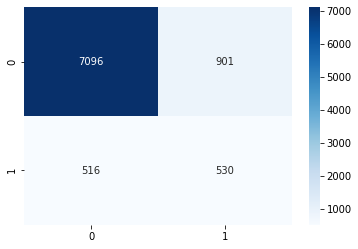

In [400]:
df_cm_gnb = pd.DataFrame(confusion_matrix(y_test,y_pred_gnb),range(2),range(2))
sns.heatmap(df_cm_gnb,annot = True,cmap='Blues', fmt='g')

## Treino e Predição Através do Naive Bayes Categórico

In [387]:
cnb = CategoricalNB()
cnb.fit(x_train,y_train)
y_pred_cnb = cnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred_cnb))

Accuracy 0.8906336392790003


In [388]:
print("Recall score: ", recall_score(y_test,y_pred_cnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_cnb,average = 'micro'))
print("F1 score: ", precision_score(y_test,y_pred_cnb,average = 'micro'))

Recall score:  0.8906336392790003
Precision score:  0.8906336392790003
F1 score:  0.8906336392790003


### Relatório de Classificação

In [389]:
print(classification_report(y_test,y_pred_cnb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7997
           1       0.53      0.43      0.47      1046

    accuracy                           0.89      9043
   macro avg       0.73      0.69      0.71      9043
weighted avg       0.88      0.89      0.89      9043



### Confusion Matrix

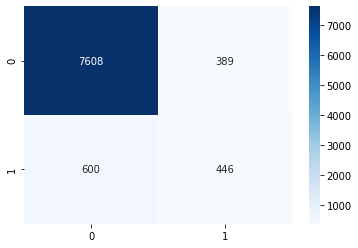

In [402]:
df_cm_cnb = pd.DataFrame(confusion_matrix(y_test,y_pred_cnb),range(2),range(2))
sns.heatmap(df_cm_cnb,annot = True,cmap='Blues', fmt='g')